In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

# Visualizing Data

```{note}
This chapter by [Todd M. Gureckis](https://gureckislab.org/~gureckis) and is released under the [license for this book](../../LICENSE). Small introductory parts are adapted from Danielle Navarro's excellent [Learning Statistics with R](https://learningstatisticswithr.com) book.  In addition the general structure borrows elements of several classic text about data visualization including Keiran Healy's [Data Visualization](https://socviz.co). Much of the Matplotlib materials comes from the [library documentation](https://matplotlib.org/tutorials/index.html) and most of the seaborn example code is drawn from the outstanding [official seaborn tutorial](https://seaborn.pydata.org/tutorial.html) by [Michael Waskom](https://www.cns.nyu.edu/~mwaskom/index.html).
```



## The art of seeing things in data

In the previous chapter we discussed the organization and manipulation of data by a computer.  However, data is lifeless and inert without our ability to detect and describe patterns in it. One part of that involves quantitative data analysis such as statistical inference, [estimation](../../chapters/08/02-estimation), or [hypothesis testing](../../chapters/09/00-hypothesistesting), topics we will review later.  However, an equally important part of analysis can be to **perceive patterns in data** and **communicate** them to others.  In order for these later two tasks to be successful, we often have to find ways to represent the data that align with our perceptual and cognitive abilities for seeing patterns.

The present chapter is therefore concerned with the visualization of data for the purpose of understanding and communication.  Visualizing data means taking features of a dataset and assigning them to graphic elements of a picture.  Using our processes of visual pattern recognition we can then detect patterns that are in the data by detecting them in an image.  The process of creating visualizations of data is itself an art but also draws a lot from ideas in the visual arts about contrast, color, spacing, typography, context, and design.


### What is a visualization?

One of the most famous data visualizations of all time is John Snow’s 1854 map of cholera deaths, a digital reproduction is shown in {numref}`fig:snowmap`:

```{figure} ./images/snowmap1-1.png
:width: 650px
:name: fig:snowmap

Reproduction of Snow's Cholera Map of London.  Orange dots show cases and the spatial layout show a clustering in a particular area of the city.
```

The visualization is elegant in its simplicity. In the background we have a street map, which helps orient the viewer and provides a **frame of reference**.  Over the top, we see a large number of small dots, each one representing the location of a cholera case.   The approximate location of the cholera case has been translated into a spatial position in the map although almost certainly began as the street address of the infected individual.  This represent the mapping between features of the data (address) to a visual feature (spatial position of an orange symbol).  The larger symbols show the location of water pumps, labeled by name. Even the most casual inspection of the graph makes it very clear that the outbreak is clustered around the Broad Street pump. Upon viewing this graph, Dr Snow arranged to have the handle removed from the pump, ending the outbreak that had killed over 500 people. Such is the power of a good data visualization.

The visual nature of the representation of the data is critical.  Imagine instead the data were simple a spreadsheet listing the name, gender, age and address of the people who were infected.  Unless you had a perfect knowledge of the streets in this area, it is unlikely just scanning the tabular data would allow the same insight afforded by the visual representation in {numref}`fig:snowmap`.

However, there are elements of the visual and stylistic choices which help as well. Here the lines of the streets are a lighter shade of gray helping them fade into the background (the layout of the street map is not as important actually), meanwhile the cholera cases are a very strong orange helping them "jump" off the page (or "popout").  Likewise the pumps are a distinct color and shape helping to prevent confusion between them and cholera cases.  These are the types of choices we will discuss below that make some visualizations better and more useful than others.

### Why create visualizations?

Why do we "visualize" data (implying seeing it with our eyes) instead of listen to data, touch it, or taste it?  Well as it turns out there is an entire approach to data "sonification" which actually does map features of a dataset to sounds which can be both beautiful as well as informative/insightful [^datasounds].  However, it turns out our visual reasoning capacities are very strong and thus are able to detect many types of patterns easily in a picture compared to a sound [^sound].

[^sound]: Many of the features one might use to map data to in a sound or music we have relatively poor absolute judgment about.  For instance people have trouble detecting the pitch of sounds, separating multiple overlaid sound sources, etc...  This often makes sound less ideal.  The same goes for other senses like touch and taste.  If our brains worked differently and didn't devote so much of our cortex to vision it might well be we'd explore data with sound more regularly.

[^datasounds]: Data Sonification.  Brian Romans, Wired: [https://www.wired.com/2007/04/data-sonification/](https://www.wired.com/2007/04/data-sonification/)

Another answer to the question of "why create visualizations?" has to do with the power of visualization to clearly point out things we were not expecting via a more traditional statistical analysis.  For example, Anscomb's Quartet ({cite}`Anscombe1973`) is often used in teaching to illustrate the power of visualization and is recreated in a few lines using Python here:

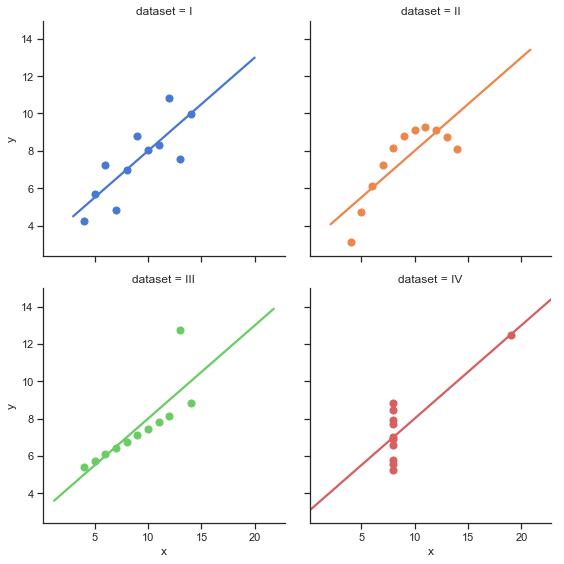

In [2]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

The quartet consists of four panels each depicting a single dataset plotted as a scatterplot with a regression line.  What is interesting about these four data sets is that they share several numerical quantities with one another.  For example, the mean of the values along either the X or Y dimension is nearly identical.  Likewise the correlation between variable x and y is basically the same in each figure.  A regression line fit to each panel will result in identical coefficients.  However, clearly by looking at each panel and comparing it to the other we can see that these dataset are quite different from one another.  Some (like data set 1 plotted in blue) do seem to depict a linear relationship (i.e., a connection between the x and y values that roughly follows a line).  However data set 2 (plotted in orange) seem clearly to show a non-linear relationship such as a parabola.  Dataset 4 (red) show data that are heavily influenced by single "outlier" points.

The key insight here is that if we calculated various descriptive statistics on these datasets we might conclude they are nearly identical.  It is only by visualizing the data in this specific way that we can see patterns we might not have expected to see.  In this way visualization can enable **discovery** of new features of a dataset and lead to new scientific hypotheses.


### Why create visualizations?

Hopefully you are now sold on the exciting concept of data visualization. How do we make a data visualization?  This chapter will step through this both conceptually and technically (using Python/Pandas).  However, first it is useful to distinguish between the two main purposes of data visualization: exploratory data analysis and communication.

- **Exploratory Data Analysis** refers to an approach to analyzing a data set to summarize the main patterns or findings.  Exploratory data analysis often begins without many clear hypotheses about the data, but instead takes the form of a kind of dialog where the experimenter or data analysts "asks a question" of a data set by designing a particular visualization or analysis and then tries to assess perceptually the answer to that question by visually processing the resulting outputs/graphics.  Exploratory data analysis is deeply related to the cognitive process of "sensemaking" and is a key skill I hope you take from this course.
- **Communication** refers to using figures to communicate the known and understood results of a dataset or experiment to the public.  This might be in the context of a publication (meaning a figure printed into the page of the paper) or a presentation (meaning a figure displayed on poster or oral presentation with slides).  Several of the design elements of a visualization used for communication differ somewhat from those for exploratory data analysis.

### What is "sensemaking"

As mentioned exploring data is an act of "sensemaking."  Sensemaking refers to the process of generating meaningful explanations or understandings for possibly incomplete or noisy data patterns in the environment {cite}`Klein:2006a`, {cite}`Klein:2006b`. In contrast to simple  pattern recognition or categorization, sensemaking is a highly-volitional process that  involves the continual evaluation of new evidence or data, and repeated information  gathering.  When we explore a data set by probing it with several different types of visualizations and analyses we are performing a type of "sensemaking" hoping to develop an easy-to-communicate summary of what the data show.

Often times it helps to begin this process without too much of a specific hypothesis in mind[^hypothesis].  One brilliant behavioral experiment performed on students of statistics makes this point.  {cite}`Yanai:2020` had students analyze a dataset of the body mass index of a large collection of individuals.  The data were provided in two files (one for men, one for women).  In one condition of this experiment, students were told to evaluate several specific hypotheses (e.g., to assess if there is a negative correlation between exercise and BMI for women, etc...).  In addition students were asked if there was any other things they could conclude from the data.  The second group was just asked to analyze the dataset to see "what they could conclude".

```{figure} ./images/gorillaexp.png
:width: 550px
:name: fig:gorilla

Figure from {cite}`Yanai:2020` which shows the "Gorilla" dataset hiding in the scatterplot between two variables across two files, as well as the results counting the number of participants in each condition that "discovered" the hidden pattern.
```

A key feature of the experiment was that if students plotted the number of steps versus the body mass index of both the men and women at the same time they would see that it clearly formed the shape of a gorilla!  Panel C of {numfig}`fig:gorilla` show how often the gorilla was or was not discovered by the students.  Interesting many more of the students found the gorilla when they were not given a specific hypothesis compared to when the were told to evaluate a specific hypothesis.

The goal of exploratory data analysis is to enable the type of discovery that would let you find this strange pattern in your data.  The problem is that you never exactly know where the interesting patterns might lie (e.g., here it was in the relationship between steps and BMI however it could have been between $log(steps)$ and BMI or some other more complex relationship).  As a result, when performing exploratory analyses we want to be on the lookout for several different patterns by exploring the data several different ways.  This means we might have a Jupyter notebook containing several plots for a single data set rather than there being one "right" plot for a given dataset.  In fact, there is rarely one "right" plot to make but instead several different ways to posing questions to a data set (i.e., "what is the relationship between steps and BMI?") give the best chance of making discoveries.


[^hypothesis]: Not all analyses should be hypothesis-free.  In fact, much of the later content of the course discusses cases where having a hypothesis is important.  Also hypotheses are often important in the design of an experiment as we have already discussed.  So don't say I told you to not develop hypotheses!  What I mean here is that when analyzing data it is useful to be too constrained at first by perceptions. 


### Style and substance

At various points in this chapter we will discuss the visual style of a plot or graphic.  This includes the colors, fonts, spacing, and other visual attributes which you can usually customize endlessly when making a plot.  The world if full of very bad visualizations which are distracting confusing or downright misleading.  The principles of visual design that go into making plots is itself a very interesting topic but beyond the full scope of this chapter.  However, several excellent resources exists for learning more about this including the classic "The visual display of information" by Tufte {cite}`Tufte:2001` and "Data Visualization: A practical introduction" by Healy {cite}`Healy:2019` (focused on using R to create plots) [^healylink].

[^healylink]: The entire text for this book is available [online](https://socviz.co/index.html#preface).

It is still worthwhile to run through some of the classic examples just to highlight the differences between a better and worse plots.

Some plots are somewhat famous for being "bad visualizations":


```{figure} ./images/fastfood.jpeg
:width: 650px
:name: fig:fastfood

A confusing plot showing the relative sales volume of different fast food chains and also the GDP of Afghanistan
```

{numref}`fig:fastfood` uses the logos themselves as a type of bar chart when a simple text label or legend would do.  As a result the **width** of the bars is another dimension varying across the examples which is distracting and makes visual comparison difficult.  The McDonald's logo appears so much lager even though it is hard to see it as twice as large as the GDP of Afghanistan.  Also the types of data mixed here seem confusing and ill conceived.

While {numref}`fig:fastfood` is simply comical, {numref}`fig:gundeaths` is disturbing:

```{figure} ./images/gundeaths.jpg
:width: 450px
:name: fig:gundeaths

A line plot from a newspaper trying to summarize the effect of a policy on gun deaths.
```

The black line plots the number of gun deaths and usually people assume bigger numbers would appear "taller" from the x-axis (bottom on plot).  However, in this case the mapping between the data and spatial position is with reference to the **top** of the figure meaning that when the line is closer to the bottom of the plot it means **more** deaths.  If someone interprets this graph in a more conventional way it appears that following the passage of the 2005 gun law in Florida allowing people to "stand their ground" gun deaths dropped (favoring the policy position of those opposed to gun control).  However, in fact the plots shows gun deaths as increasing somewhat dramatically following the passage of the law reversing a trends towards public safety that had been developing over the prior decade.  This is sometimes seen as an "evil" use of data visualization and one that you should be on the lookout in newspapers and TV reports which often attempt to sway your opinion with poor presentations of data.  The key to not being tricked is to **always check the axes when looking at a plot**.

The problem of making a nice looking informative plot is somewhat complicated by some of the default options for certain software programs.  For example, several years ago Excel would provide default line plots that were rendered in 3d (e.g., {numref}`fig:excel`.  While 3d looked "cool" and novel it doesn't add much over a simple line and in fact makes it harder to visually compare multiple lines plotted in the same figure:


```{figure} ./images/excel.png
:width: 350px
:name: fig:excel

A 3d line plot which was a easy to create default in Excel several years ago.  It can be hard to compare the lines to one another given the distracting perspective on the data.
```

Given the array of options provided by modern data visualization software it can be hard to not get pulled towards bad color schemes and plot layouts/designs, especially if you are not particularly artistically inclined.  Fortunately, newer software packages made more sensible choices that work for most cases.  For instance, we will focus on the [seaborn](https://seaborn.pydata.org) library in this class which is an easy to use plotting library for Python but also which make several choices about colors and plot layout/design that are already known to make visually [pleasing plots](https://seaborn.pydata.org/examples/index.html).  Of course it it still up to you to make the plot informative and not misleading, but these libraries help remove the number of choices available to you and letting you focus on data analysis and interpretation itself to a large degree.

## How to make plots in Python

The goals in this chapter are twofold: firstly, to discuss several fairly standard graphs that we use a lot when analysing and presenting data, and secondly, to show you how to create these graphs in Python. The graphs themselves tend to be pretty straightforward, so in that respect this chapter is pretty simple.

However, the difficulty usually come when trying to customize your plot.  Here there can be a lot of options and sometimes doing something that seems simple ends up being more complex than you anticipated.  Getting to the point of mastery with these things tends to elude even the most accomplished scientist or data scientist.  Usually solving these problems involve a fair amount of google searches, looking for solutions online or borrowing code from others.  As a result you will not feel a complete sense of "mastery" after reading this chapter.  However, you can get far enough that you can understand how to make most common plots and also know the right terms to search for when trying to solve more complex problems.

### The wild world of plotting in Python

Most of this chapter will focus on the matplotlib library ( [https://matplotlib.org](https://matplotlib.org)) and related libraries.  Matplotlib is a general putpose graphics and plotting library for Python.  It aims to adopt must of the same syntax as the plotting routines used in [Matlab](https://www.mathworks.com/products/matlab.html), another popular scientific programming language.  Matplotlib is very powerful but is just one of the plotting options for Python.  Others include [plotly](https://plot.ly), [Bokeh](https://docs.bokeh.org), etc...  Indeed, {refnum}`fig:pythonmap` by Jake VanderPlas shows all the different options and how they relate to one other as of around 2020.


```{figure} ./images/PythonVisLandscape.jpg
:width: 550px
:name: fig:pythonmap

Jake VaderPlas' landscape of python plotting libraries (circa 2019).
```

The reason this class will focus on matplotlib is the close link between matplotlib and the [pandas](https://pandas.pydata.org) data frame library, and [seaborn](https://seaborn.pydata.org) which is visible in the plot above.  I have found that seaborn can make many complex plots very easy (often as short as 1-2 lines).  For more complex plots one can drop back to "raw" matplotlib and customize as you like.  However, for some things other libraries can be better.  For instance Bokeh has some really nice ways of making interactive graphics and visualizations.

The relationship between matplotlib and seaborn is that seaborn wraps around matplotlib and provides very nice looking graphs without requiring you to do so much work choosing colors and things.  As a result you can quickly get views on your data that are mostly publication-ready.

Mostly in this class we will work with seaborn to make scientific plots.  However, knowing a little bit about matplotlib is useful even when using seaborn to be able to change certain things in your figures.

## Introduction to matplotlib

Before we get too deep in the weeds lets look at a few very simple graphs.  Let's begin by making a small list called `fibonacci` that contains a few numbers we'd like python to draw for us.  Then, we'll ask python/matplotlib to plot it.  Here is a simple line plot:

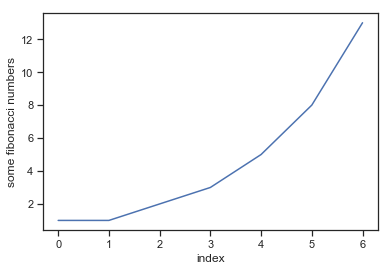

In [5]:
import matplotlib.pyplot as plt
fibonacci = [1,1,2,3,5,8,13]
plt.plot(fibonacci)
plt.ylabel('some fibonacci numbers')
plt.xlabel("index")
plt.show()

The code does a couple of things.  First is imports the matplotlib pyplot module (more on that in a moment) as `plt`.  That means that future calls to the matplotlib library can mostly be made using `plt`.  Next it creates a short list of fibonacci numbers.  Then is calls `plt.plot(fibonacci)` which create a basic plot.  The plot assumes the given numbers are the y values and assigned sequentially increasing x values to each point (going from 0 to 6 in this case).  Next, we add a y-label and then an x-label to the figure.  Finally we call `plt.show()` which displays the plot in the Jupyter notebook.

The first reaction most people (particularly new users) have looking at a plot like this that they'd like to change a few things.  For example, maybe you don't like the boring blue color or something.  Well it is possible within the very basic matplotlib [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html) interface to change many of these things quite simply.  First let's plot a second line on the same plot which shows a linearly increasing sequence of integers for comparison:

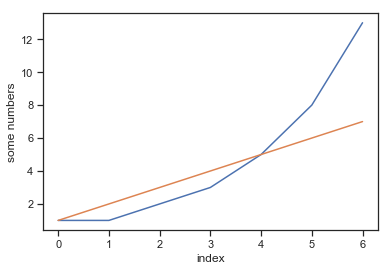

In [6]:
import matplotlib.pyplot as plt
fibonacci = [1,1,2,3,5,8,13]
plt.plot(fibonacci)
linear = [1,2,3,4,5,6,7]
plt.plot(linear)
plt.ylabel('some numbers')
plt.xlabel("index")
plt.show()

If we want to change the colors of the plot here we can specify them as an argment to the `plt.plot()` function.  There are a variety way to set colors in matplotlib but one simple one is through a single character reprenting common colors:

| **code** | **color** |
|-------|------------|
| b | blue |
| g | green |
| r | red |
| c | cyan |
| m | magenta | 
| y | yellow |
| k | black |
| w | white |



You can read more about colors in matplotlib [here](https://matplotlib.org/tutorials/colors/colors.html).  Here's an example where we change the color of the two lines we plotted to be cyan and magenta.

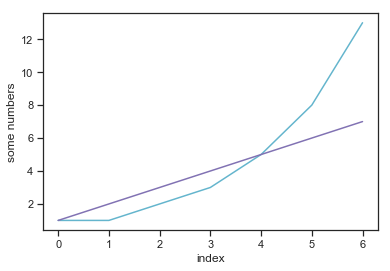

In [7]:
import matplotlib.pyplot as plt
fibonacci = [1,1,2,3,5,8,13]
plt.plot(fibonacci,'c')
linear = [1,2,3,4,5,6,7]
plt.plot(linear,'m')
plt.ylabel('some numbers')
plt.xlabel("index")
plt.show()

You can also change the type of line that was drawn by specifying a single character after the color


| **code** | **type** |
|-------|------------|
| - | solid line |
| -- | dashed line |
| -. | dash-dotted line |
| : | dotted line |
| '' | none | 

Here's an example where the fibomacci sequence was turned to a dashed line and the linear sequece to a dotted one.  Kind of looks nice in some ways.

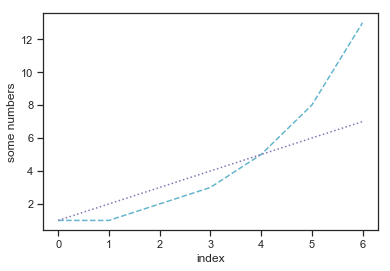

In [8]:
import matplotlib.pyplot as plt
fibonacci = [1,1,2,3,5,8,13]
plt.plot(fibonacci,'c--')
linear = [1,2,3,4,5,6,7]
plt.plot(linear,'m:')
plt.ylabel('some numbers')
plt.xlabel("index")
plt.show()

Anytime we have multiple patterns in the same plot using colors to differentiate them we want to give the reader some type of **legend** which lets them lookup the meaning of the different colors.  In matplotlib this can be as simple as just calling the `plt.legend()` function.

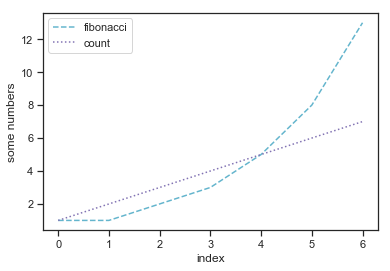

In [9]:
import matplotlib.pyplot as plt
fibonacci = [1,1,2,3,5,8,13]
plt.plot(fibonacci,'c--', label='fibonacci')
linear = [1,2,3,4,5,6,7]
plt.plot(linear,'m:', label='count')
plt.ylabel('some numbers')
plt.xlabel("index")
plt.legend(loc='upper left')
plt.show()

The legend is a little box that appears within the plot (if there is space and it wouldn't cover up important data) that provides the meaning of what the lines show.  Notice we added a `label` option to each line we plotted so that the legend knows what to display.  You can of course customize this.

Speaking of customization, this chapter could go on for pages (and in fact could be an entire book) if we stepped through every possible customization available within matplotlib.  Instead, I am providing links here to a couple of the useful tutorials on the matplotlib website.  If you get interested in becoming a plotting master in matplotlib reading through these might be helpful.

- [Intro to pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py): this is a very basic introductory mode of using matplotlib most similar to matlab
- [Colors in matplotlib](https://matplotlib.org/tutorials/colors/colors.html): learn about all the color options
- [A guide to legends](https://matplotlib.org/tutorials/intermediate/legend_guide.html): how to customize legends
- [A gallery of examples with code](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py): Check here and perhaps you can get some starter code

### Some (sometimes interesting) technical stuff

Here is a bit of technical stuff about matplotlib which is not strictly *necessary* to know in order to make most plots, especially in seaborn but can help you understand a bit more about why certain commands exist.  First we want to decompose a figure into various parts:


    
<div style="text-align: center">
    <img src="https://matplotlib.org/_images/anatomy.png" width="650">
</div>

There are lots of graphic elements that you can modify in matplotlib but the most important conceptual ones are the **figure**, the **axes**, and the **axis**.

#### Figure

The overall figure is a special object in matplotlib.  The figure keeps track of all the various elements of the figure.  A figure can have one or more **axes**, **legends**, **titles** and so on as well as the **canvas** which (like a painting) is where things are drawn.  To create a figure:

In [32]:
fig = plt.figure()  # an empty figure with no axes

<Figure size 432x288 with 0 Axes>

However, since there is nothing in the figure yet it often doesn't display anything yet.  You don't need to explicitly create a figure in all cases.  For example, in the first example in this notebook we just called `plt.plot()` which by itself created a new figure.  However, at a lower level a figure object is the basic starting point for building a plot.  You rarely ever need to call the figure like this directly but it is useful to know the concept of a figure when reading some code snippets online.

#### Axes

A more interesting case is to add a set of *axes* to the figure.  Axes are what we typically would think of as a "plot".  The next command uses `plt.subplots(2,2)` to create a figure composed of two columns with two rows of plotting axes.  This is useful for making multi-panel figures.  

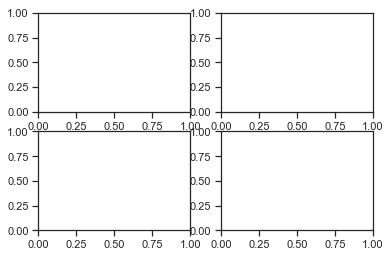

In [68]:
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

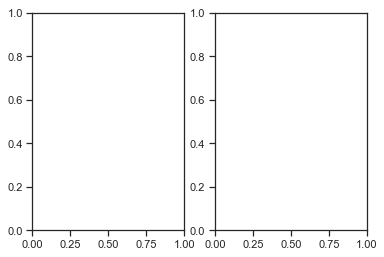

In [79]:
fig, ax_lst = plt.subplots(1, 2)  # a figure with a 1x2 grid of Axes

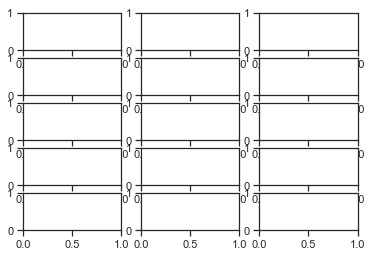

In [81]:
fig, ax_lst = plt.subplots(5, 3)  # a figure with a 5x3 grid of Axes

Now something is displayed in Jupyter because there is something to draw.  Again notice we didn't need to call `plt.figure()` to explicitly create a plot because subplots does it for you. 

Notice that `plt.subplot()` returns two variables.  One is the figure (which we assigned to a variable `fig` and another which is a list containing the axes for the plot (which we assigned to `ax_lst`).

Lets look inside `ax_lst`:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12aa03278>,
      dtype=object)

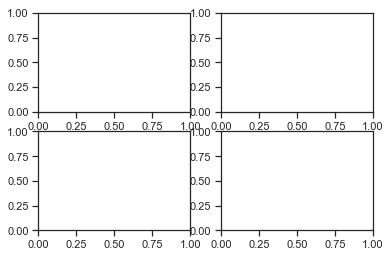

In [82]:
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
ax_lst

Notice it contains an 2 dimensional array (2x2 in this case) which has a subplot object.  This is how we can configure or control individual subpanels (i.e., axes).  For example here are a few ways to add a title to each panel:

Text(0.5, 1.0, 'Panel 4')

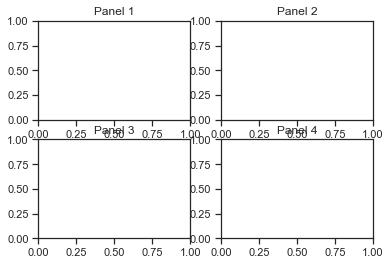

In [108]:
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
ax_lst[0,0].set_title("Panel 1")
ax_lst[0,1].set_title("Panel 2")
ax_lst[1,0].set_title("Panel 3")
ax_lst[1,1].set_title("Panel 4")

So this steps through each axes we created and adds a title to the corresponding plot.  We can do other things as well like add a x-label:

Text(0.5, 0, 'x')

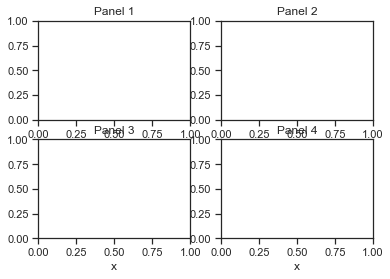

In [109]:
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
ax_lst[0,0].set_title("Panel 1")
ax_lst[0,0].set_xlabel("x")
ax_lst[0,1].set_title("Panel 2")
ax_lst[0,1].set_xlabel("x")
ax_lst[1,0].set_title("Panel 3")
ax_lst[1,0].set_xlabel("x")
ax_lst[1,1].set_title("Panel 4")
ax_lst[1,1].set_xlabel("x")

It can be a little hard to see, but we added here a label 'x' to each panel.  Let's fix it by calling the `plt.tight_layout()` command which spacing things out a little:

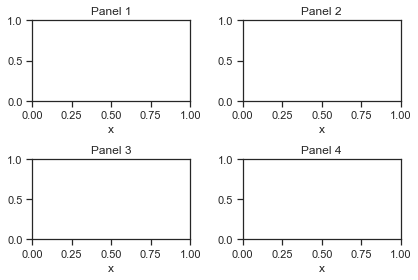

In [110]:
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
ax_lst[0,0].set_title("Panel 1")
ax_lst[0,0].set_xlabel("x")
ax_lst[0,1].set_title("Panel 2")
ax_lst[0,1].set_xlabel("x")
ax_lst[1,0].set_title("Panel 3")
ax_lst[1,0].set_xlabel("x")
ax_lst[1,1].set_title("Panel 4")
ax_lst[1,1].set_xlabel("x")
plt.tight_layout()

Now we can see what is happening better.  Looks so nice!  Almost don't want to add data to it!

The key point is, as you can see, a **Figure** can contain many **Axes**.   Each Axes has a title (set via `set_title()`), an x-label (set via `set_xlabel()`), and a y-label set via `set_ylabel()`).  

Before moving on let's look at a couple other useful things to do with axes.  One is that it is sometimes useful to give a title not to an individual axes but to the overall figure.  `fig.suptitle()` works well for this:

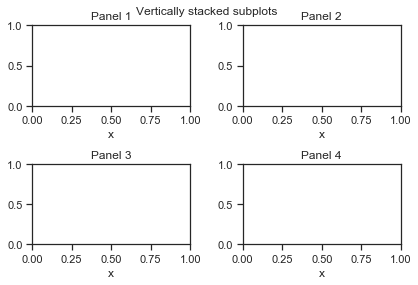

In [99]:
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
fig.suptitle('Vertically stacked subplots')  # add a overall title
ax_lst[0,0].set_title("Panel 1")
ax_lst[0,0].set_xlabel("x")
ax_lst[0,1].set_title("Panel 2")
ax_lst[0,1].set_xlabel("x")
ax_lst[1,0].set_title("Panel 3")
ax_lst[1,0].set_xlabel("x")
ax_lst[1,1].set_title("Panel 4")
ax_lst[1,1].set_xlabel("x")
plt.tight_layout()

Sometimes it is nice to iterate over the figures in a single for loop. To do this you can access `ax_lst.flat` which "flatten" the 2-dimensional figure into a list of plots you can modify one by one.

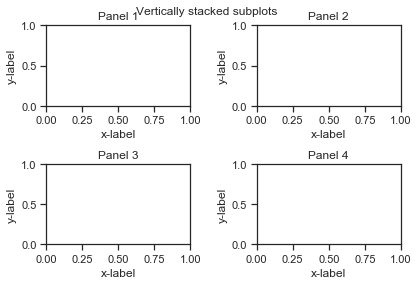

In [106]:
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
fig.suptitle('Vertically stacked subplots')  # add a overall title
ax_lst[0,0].set_title("Panel 1")
ax_lst[0,1].set_title("Panel 2")
ax_lst[1,0].set_title("Panel 3")
ax_lst[1,1].set_title("Panel 4")
for ax in ax_lst.flat:
    ax.set_xlabel('x-label')
    ax.set_ylabel('y-label')
    #ax.set(xlabel='x-label', ylabel='y-label')  # alternative way to do the same thing in 1 line
plt.tight_layout()

Even more interesting is to only show the x and y labels on the "outer" axes, i.e., those on the left and bottom of the main figure:

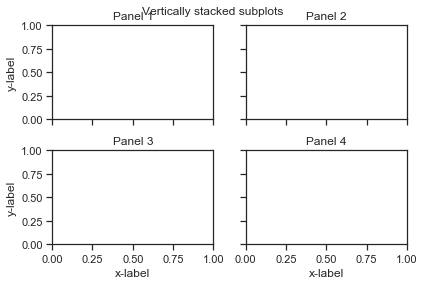

In [111]:
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
fig.suptitle('Vertically stacked subplots')  # add a overall title
ax_lst[0,0].set_title("Panel 1")
ax_lst[0,1].set_title("Panel 2")
ax_lst[1,0].set_title("Panel 3")
ax_lst[1,1].set_title("Panel 4")
# add
for ax in ax_lst.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
    ax.label_outer()
plt.tight_layout()

Now things are looking really nice!  If you get really advanced you can make plots that have interesting tiled patterns:

Text(0.5, 1.0, 'gs[-1, -2]')

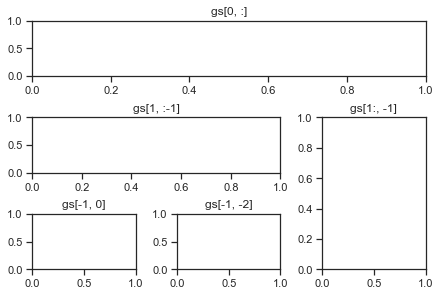

In [112]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3, 3)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')
f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax5 = fig3.add_subplot(gs[-1, -2])
f3_ax5.set_title('gs[-1, -2]')

If you want to learn more about subplots and more advanced plot layout like the one below check out the matplotlib tutorials on [gridspec](https://matplotlib.org/3.1.0/tutorials/intermediate/gridspec.html#sphx-glr-tutorials-intermediate-gridspec-py) and the [tight layout guide](https://matplotlib.org/3.1.0/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py).

#### Axis

The Axes contains two or three Axis objects (be aware of the difference between **Axes** and **Axis**) which take care of things like the range of numbers that are displayed in the plot, the markings known as 'ticks' that appear along a axis the help you know the value of numbers, and the labels (the data limits can also be controlled via set via the `set_xlim()` and `set_ylim()` Axes methods).  To understand the axis it can be helpful to actually plot some data. 

Let's start with some interesting oscillatory patterns:

In [119]:
x1 = np.linspace(0.0, 5.0, 50)  # first use linspace to create the xvalues
x2 = np.linspace(0.0, 2.0, 50) 
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1) # next use the cosine function to create a dampened
y2 = np.cos(2 * np.pi * x2) # and un-dampened oscillatory function

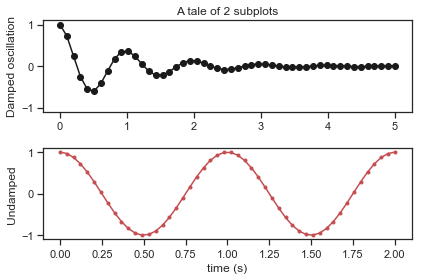

In [121]:
# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharey=True)

ax1.plot(x1, y1, 'ko-')
ax1.set(title='A tale of 2 subplots', ylabel='Damped oscillation')

ax2.plot(x2, y2, 'r.-')
ax2.set(xlabel='time (s)', ylabel='Undamped')
plt.tight_layout()
plt.show()

Very cool!  Ok now what if we repeat the above but adjust the x range (meaning the scale of where the x-axes goes)

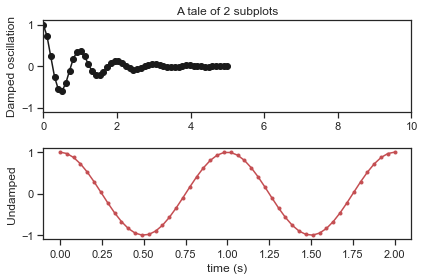

In [124]:
# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharey=True)

ax1.plot(x1, y1, 'ko-')
ax1.set(title='A tale of 2 subplots', ylabel='Damped oscillation')
ax1.set_xlim(0,10)  # <---- THIS IS THE NEW LINE

ax2.plot(x2, y2, 'r.-')
ax2.set(xlabel='time (s)', ylabel='Undamped')
plt.tight_layout()
plt.show()

Notice how the plot axis for the first subplot now ranges from 0 to 10.  Since we intially generated x values that only go from 0 to 10 the data stops about 1/2 way into the plot.  Another thing you can do is adjust how many ticks appear on the figure.  For example, we might find the measumrents of time in the second panel down to the 0.25 second to be too many.  Let's space things out:

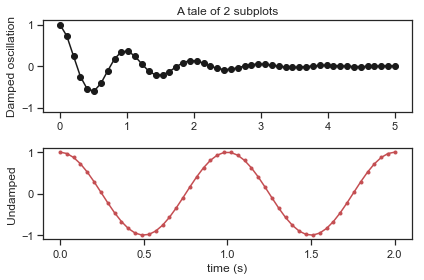

In [131]:
# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharey=True)

ax1.plot(x1, y1, 'ko-')
ax1.set(title='A tale of 2 subplots', ylabel='Damped oscillation')


ax2.plot(x2, y2, 'r.-')
ax2.set(xlabel='time (s)', ylabel='Undamped')
ax2.set_xticks(np.arange(0,2.001, 0.5))  # <---- THIS IS THE NEW LINE
plt.tight_layout()
plt.show()

Notice we now have tick marks only on each 0.5 second interval.  You can do the same thing by calling `set_yticks()` to change the tick frequency on the y-axis.

There are a few other details about matplotlib that are useful to know about such as legends, etc... but for now this should help get you oriented to the main things.

## Exploring common plot types through seaborn

We now have a general sense of how to control some basic aspects of a plot.  However, it feels like a lot of work.  We have to create axes, adjust axis, add tick marks, adjust the colors of plots, etc...  This seems like it would be a lot of hassle (and it is!).  However, luckily there are some pacakges for python that make common types of plots very easy to deal with.  One of the best libraries for this is [seaborn](https://seaborn.pydata.org).  From the seaborn website:

> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.


```{figure} ./images/logo-wide-lightbg.svg
:width: 350px
:name: fig:seaborn

The Seaborn Library logo.
```



Before reading further I encourage you too check out the seaborn [gallery](https://seaborn.pydata.org/examples/index.html) which shows off some of the types of figures possible with seaborn.  The thing to note is the wide range of plots but also the nice, professional looking color schemes, etc...  Seaborn provides this for you so you don't have to do all this extra work.  If you click on an example in the seaborn gallery it shows you the code that was used to generate the plot.  In almost all cases even pretty complex plots take less than a 1/2 page of code.

Seaborn itself has an extensive and very helpful [tutorial](https://seaborn.pydata.org/tutorial.html).  However, in this chapter we are also aiming to introduce students to the basic types of plots for different types of data and so we will step through some of the same material talking about the advantage of a particular plot type for visualizing a particular type of question.

In order to import seaborn we usually use the following command:

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

If you are following along with these examples you should make sure to perform this import first.

### Figure-level and axes-level functions in seaborn

Seaborn provides a number of high-level functions for creating plots.  For example here is a quick example of a scatterplot (described more below):

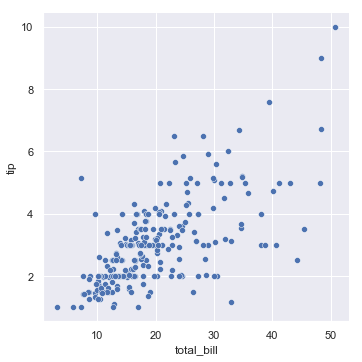

In [37]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

This function (`relplot()`) is known as a **figure** level function because it creates a underlying matplotlib figure and the relevant axes and then shows the figure all in one step.

Alternatively there are axes-level functions.  Sometimes these do roughly the same thing but instead will display a plot into an already created axes and figure.  For example, consider the following example:

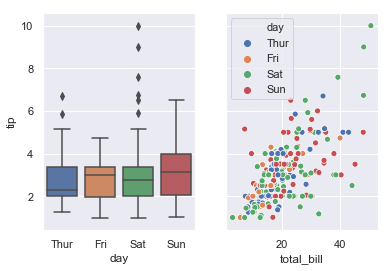

In [142]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(x="day", y="tip", data=tips, ax=axes[0])
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=axes[1]);

Here, `boxplot()` and `scatterplot()` are known as axes-level function.  The main cue is that they include an argument which is which axes they should be drawn to (here we create a 1x2 arrange of axes and then the `boxplot` is drawn into the first axes and `scatterplot` is drawn into the second axes.

When you look at the [API reference](https://seaborn.pydata.org/api.html) for seaborn that is an important cue to pay attention to.  Figure-level thing are described that way and mean they created their own figure can axes whereas axes level functions need to be drawn into an existing matplotlib figure.  The is a good overview of the differences between figure-level and axes-level functions [here](https://seaborn.pydata.org/tutorial/function_overview.html) in the seaborn tutorial docs.

Seaborn is particularly uses in Python when combined with Pandas dataframes that we learned about in a previous chapter.  In particular, seaborn makes it very easy to map columns of a data frame to visual attributes of a plot.  If you remember from the intro to this chapter, creating visuals is about mapping between elements of data and some visual feature or representations.   The structure of Pandas+Seaborn makes this very clear.  Let's go through several examples of common types of plots that you would use in an analysis, discuss the types of data they are best suited for, each time paying attention to how we specify to seaborn the mapping between columns of our data and visual attributes of a plot.

### Scatterplots

Scatterplots are a simple but effective tool for visualising data. We’ve already seen scatterplots in this chapter, when using the plot() function to draw the Fibonacci variable above. However, for the purposes of this section I have a slightly different notion in mind. Instead of just plotting one variable, what I want to do with my scatterplot is display the relationship between two variables. It’s this latter application that we usually have in mind when we use the term “scatterplot”. 

In this kind of plot, each observation corresponds to one dot: the horizontal location of the dot plots the value of the observation on one variable, and the vertical location displays its value on the other variable. In many situations you don’t really have a clear opinions about what the causal relationship is (e.g., does A cause B, or does B cause A, or does some other variable C control both A and B). If that’s the case, it doesn’t really matter which variable you plot on the x-axis and which one you plot on the y-axis. However, in many situations you do have a pretty strong idea which variable you think is most likely to be causal, or at least you have some suspicions in that direction. If so, then it’s conventional to plot the cause variable on the x-axis, and the effect variable on the y-axis. With that in mind, let’s look at how to draw scatterplots in seaborn.

First let's use seaborn to load some example data.  Seaborn includes a few built-in dataset including one called 'tips' which looks at how much people tip as a function of a number of variables such as the total bill, if the person was a smoker, the day of the week, etc..  The seaborn `sns.load_dataset()` function loads a pandas dataframe:

In [144]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Notice that this dataset is "tidy" in the sense that distinct variables appear in their own column and the rows reflect individual measurements.

We can then make a scatter plot of the total bill versus the tip amount using ONE LINE!

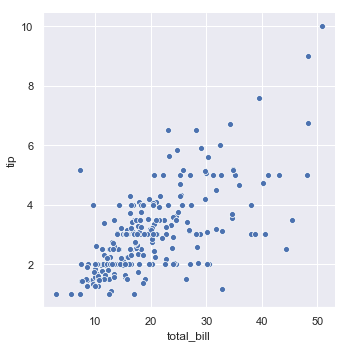

In [146]:
sns.relplot(x="total_bill", y="tip", data=tips);

I think that's pretty impressive and it looks pretty interesting!  The key thing is that we used the `sns.relplot()` command which is a figure level command for plotting the relationship between multiple vairables.  Lets unpack the code.  The last argument is critical: `data=tips`.  This tells seaborn we want to plot something from the tips dataframe we created earlier.  Next we also tell Seaborn the mapping between elements of the dataframe and our plot.  For instance when we say `x="total bill"` we are telling Seaborn to map the x-value of each dot in the scatter plot to the `total_bill` column.  We also write `y="tip"` which tells seaborn that the `tip` column should be used for the y-position.  

```{note}
This example highlights one very important part of seaborn which is that it deeply integrates to pandas dataframes.  Often the way you are able to specify complex plots in seaborn is that you have a dataframe and seaborn helps you see the different patterns between the columns of that dataframe.  This is kind of why we went to such trouble in this class to teach you pandas and python.  Because once you get use to dealing with a dataframe like pandas then many other aspects of data analysis and visualization become much simpler!
```

The `relplot()` command can also plot a third variable or relationship by using color.  In seaborn this is called "hue semantic" because the color starts to show a meaning:

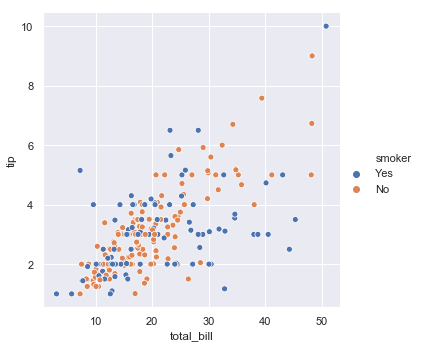

In [149]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

Again, the right way to read this is that we are telling Seaborn to do a scatterplot with the data in the Pandas dataframe we called `tips`.  We tell it to map the x value of each dot to the `total_bill` column, the y value of each dot to the `tip` column, and the color (hue) to the discrete yes/no `smoker` column.  Mapping data to visual elements of the picture.

I guess it looks a bit like smokers might be a stingier.  Notice that a legend was automatically added to the figure.  Colors were also automatically chosen to be clearly distinguishable but also pleasing.

The amazing thing about seaborn is that we can quickly look at a different relationship if we want.  For example, the 'size' column of the data frame is the number of people in the party (i.e., seated at the same table).  So instead of using 'smoker' as the grouping factor we can use the party size:

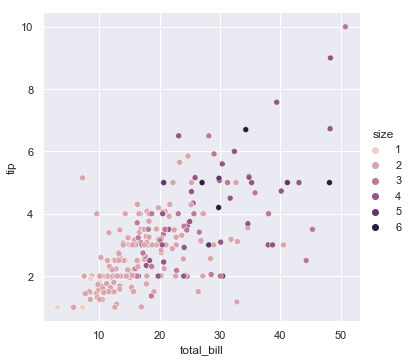

In [38]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

Again, we knew that hue should be set to the name of a column in the pandas dataframe.  Interestingly seaborn automatically adjusted the colors to be a nice pink-purple scale instead of orange/blue because there were more categories of size and the are not a nominal factor.  Again, this highlights how useful seaborn is for exploring datasets.  Two lines, two very different views on the same data.

You can also change the symbol used in the scatter plot by assigning the 'style' of the marker to one of the columns.  For example, going back to the smoker example we can make the differences even more obvious by setting the color and size to reflect the smoker status:

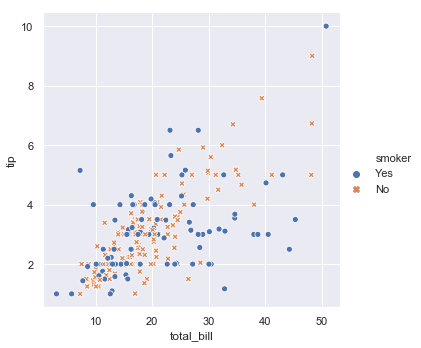

In [152]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips);

You can go overboard and put lots of data relationships in the same plot:

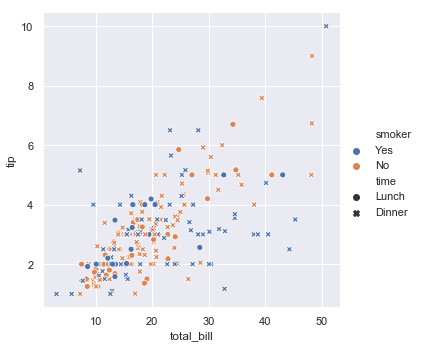

In [153]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

So now we have color showing smoking, style/marker type showing if it is lunch or dinner and otherwise the plot relates the total tip to the total bill.

```{note}
Another reason this data is so easy to plot is because it is organized in a pandas dataframe as a **tidy** dataset.  We discussed tidy data formatting in a previous chapter.  However, this is where that discussion begins to pay off.  Because each piece of data is a column and there are descriptors of each data point in the other columns we can easily use different columns to group or color the data in a myriad of ways.  The main point is that adopting dataframes+tidy data organization makes all the other stuff you do very simple (as short as one line often!).  It's like being organized - it can make your life better!
```

Going back to the example of using the size of the party to determine the color of the points.  Imagine instead we want the size of the dot to relect the size of the party:

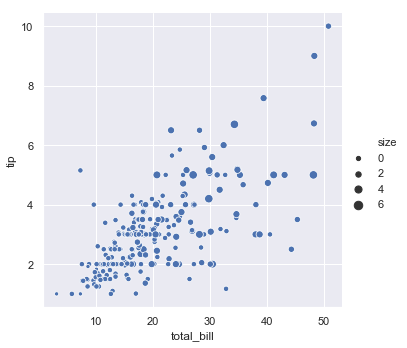

In [155]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

Now everything is the same color but the bigger dots relect bigger tables which kind of has a nice congruency to it.  You can also change the range of sizes used in the display:

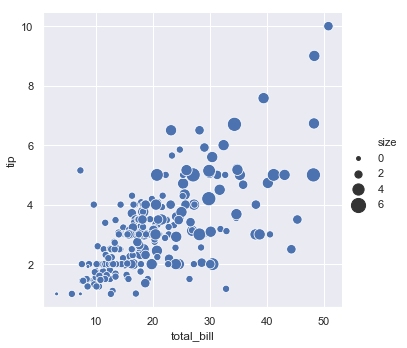

In [156]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

I hope that you are at least a little impressed by seaborn at this point.  Usually in a single line you were able to look at this multi-variate dataset a number of different ways which give you some insight into the relationships.  The ease of doing this is critical to the sensemaking process described at the beginning of this chapter.  By making small changes to the mapping between dataframes and visual elements of a plot we get different depictions of the data.  

The key to effective use of seaborn is to let it help you do these types of things while relaxing about some of the details.  For instance these dots all have a nice blue color.  While it is really not that big of deal to change the color using seaborn, why bother?  You have a nice color pallete selected in advance and you can focus on other things.  The key is relaxing and letting other people figure out the detailed stuff so you can focus on your science/data analysis.

### Lineplots

Scatterplots are a very, very important tool for getting insight into the relationship between two continuous variables.  However, some types of data individual data points are linked to one another.  For example, data that occurs in time might be better visualized as a line.  Let's create some example data:

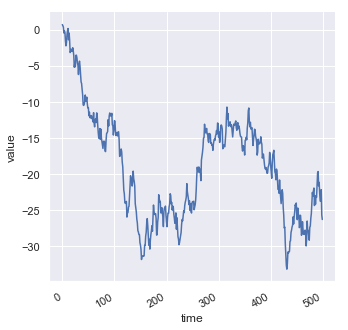

In [157]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

Notice this is a very different looking plot however it uses the same `replot()` function we used for the scatterplot.  The main difference is that the `kind='line'` option was set.  If we plot the same data without the kind option set we get a scatterplot again:

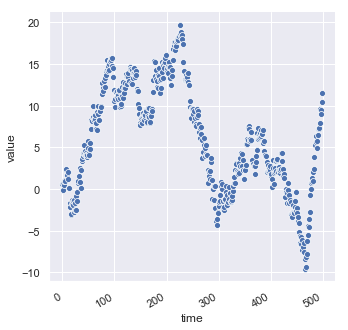

In [159]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", data=df)
g.fig.autofmt_xdate()

Because seaborn's `relplot()` assumes that you are most often trying to draw y as a function of x, the default behavior is to sort the data by the x values before plotting. However, this can be disabled by setting (`sort=False`):

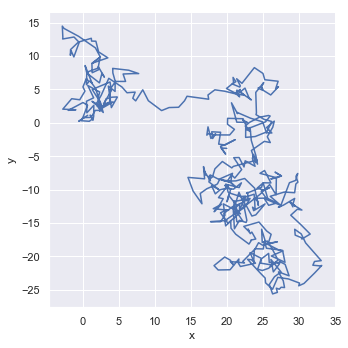

In [160]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

### Categorical scatterplots

In the previous section we talked about visualizing the relationship between two continuous variables, possibly using color or the size of dots to display additional information about this relationship.  When we have a categorical or nominal indepdendent variable but a continuous dependent variable (E.g., reaction time as a function of different conditions in an experiment) a different plot might make more sense.  

One nice plot is known as the categorical scatterplot.  Here is an example for the `tips` dataset we have explored earlier:

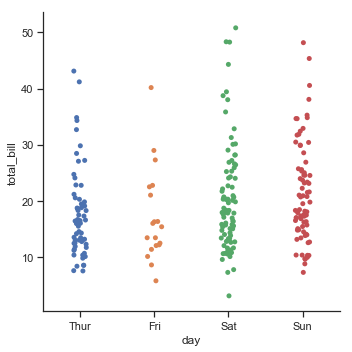

In [5]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

Let's unpack what is going on here.  First we have our categorical variable (day of the week or the column `day` in our dataset).  Then within each level of this variable we have plotted the total bill (`total_bill` column of the dataframe).  Notice that dots are randomly jittered a bit so they don't all plot on top of one another.  This gives a nice visual summary of what types of values are outlier (e.g., the 40 dollar bill on Friday) as well as what seems typical (usually bills are about $20.  We can also see that perhaps people spend a little more money on Saturday and Sunday on their total bill.

You can get rid of the jitter like this:

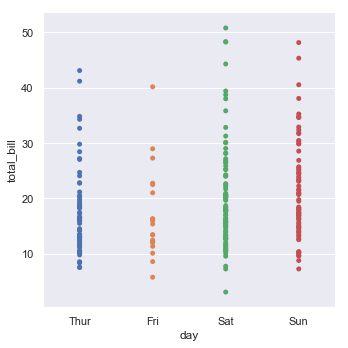

In [163]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

But of course this does not illustrate the data as clearly since everything is on top of one another.  Related to jitter is a thing called a "swarmplot" which prevents the dots explicitly from overlapping visually:

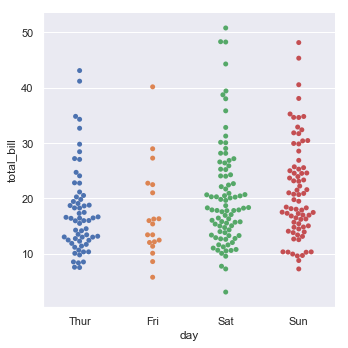

In [165]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

The seaborn categorical plotting function can do the same color grouping for an additional factor.  For example we can color the observations by if they were male or female waiters:

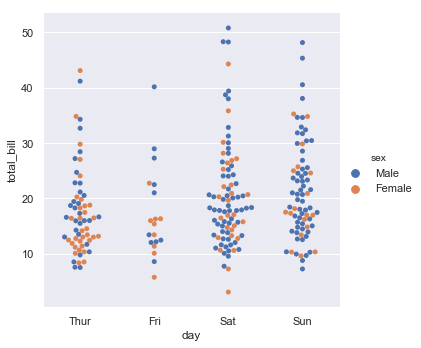

In [166]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

### Boxplots

Categorical scatterplots are nice in that they let you see more of the overall distribution of the individual scores.  However, there are also times where it is useful to plot more schematic or summary data (particularly when the number of data points gets really large).  For this, a very common and traditional type of plot is the box plot or box-and-whisker plot.  In fact, boxplots are simply a special type of seaborn categorical plot (`kind="box"`):

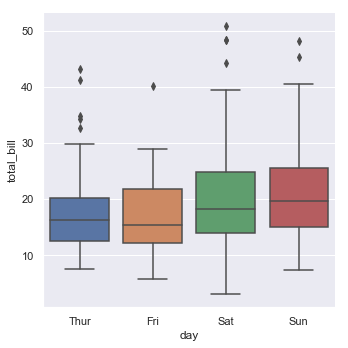

In [167]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

Box plots show a lot of information at once about each categorical factor.  Usually they show the median (middle line) and the 75th and 25th percentile (edges of the box), then whiskers extend beyond.  Here is a useful chart which shows a typical box and whisker type plot but this is **not** what seaborn plots.

<div style="text-align: center">
    <img src="./images/boxplot1_annotated.png" width="350">
</div>

Instead the whiskers in seaborn by default extend to points that lie within 1.5 inter-quartile range (IRQs) of the lower and upper quartile and then an points that go beyond this are plotted one by one (helping you see possible outliers).

You can add another dimension to the graph using the 'hue' option we saw earlier:

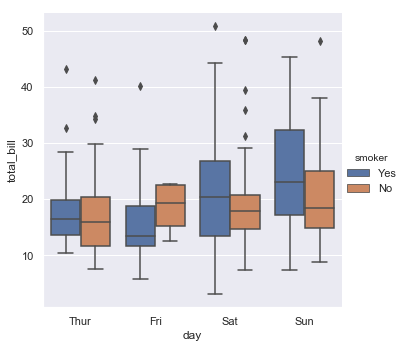

In [169]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

Here the different levels of smoker (yes/no) are put side by side due to a behavior called 'dodge' which can be turned off with generally poor results given the similarity of the data in these conditions.

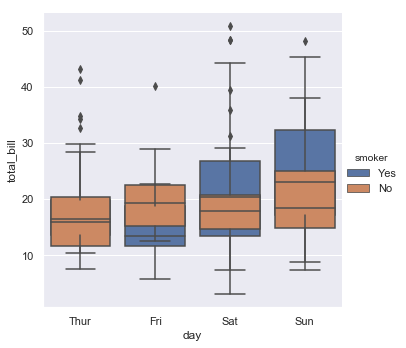

In [173]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", dodge=False,data=tips);

### Raincloud plots and violin plots

The purpose of boxplots and categorical plots is to summarize the distribution of responses with different conditions.  There is a balance between showing the data directly (like the categorical scatterplot) and showing the summary of the data (like the boxplot).  Recent some new types of figures have been proposed which aim to accomplish both things.

One example is the violin plot:

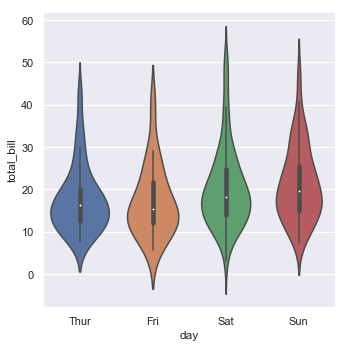

In [177]:
sns.catplot(x="day", y="total_bill", kind="violin", split=True, data=tips);

The violin plot shows a small box plot in the center with a smoothed "kernel density estimator" (a type of smoothed histogram) showing where the data actually fall.  You can also use the 'hue' option with this type of plot with kind of an interesting a compact comparison between the second factor.

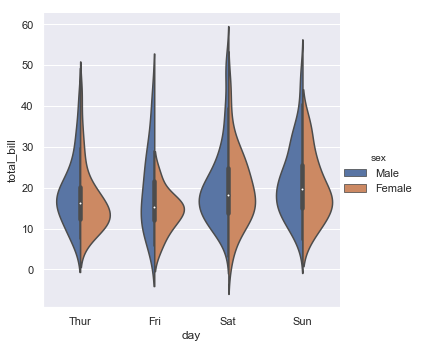

In [176]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=tips);

People have taken these types of plots to the extreme and there are even really nice plots call "Raincloud" plots which plot the kernel-density smoothed histogram (like a violin plot), a categorical scatter plot (jittered data points), and a box plot with whiskers all on the same figure.  When oriented horizontally these plots look like a rain cloud with little rain droplets beneath, hence the name.  There is a nice library called [ptitprince](https://github.com/pog87/PtitPrince) which simplifies the seaborn commands required to make such a plot making it only a single line.

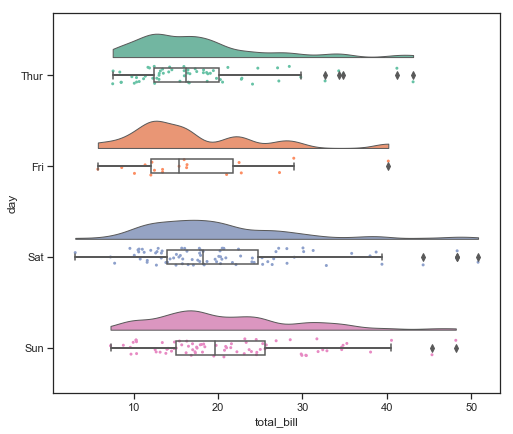

In [12]:
import ptitprince as pt
#same thing with a single command: now x **must** be the categorical value
f, ax = plt.subplots(figsize=(8, 7))
pt.RainCloud(x = 'day', y = 'total_bill',  bw = 0.2,
                 width_viol = .6, ax = ax, orient = "h", data = tips)

Here is the vertical version:

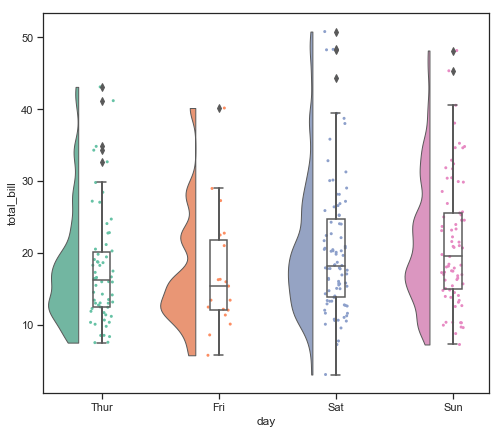

In [19]:
import ptitprince as pt
#same thing with a single command: now x **must** be the categorical value
f, ax = plt.subplots(figsize=(8, 7))
pt.RainCloud(x = 'day', y = 'total_bill',  bw = 0.2,
                 width_viol = .6, ax = ax, orient = "v", data = tips)

The "bw" option here controls the "smoothness" of the kernel denisity estimator.

Overall these are about the most ultra-categorical plot you can get!

### Barplots

Perhaps the most common plot of all time besides the scatter plot is the bar plot.  This draws a set of bars reflecting some categorical variable and the height of the bar usually reflects the mean value of the dependent measure.  To illustrate this we will load in another pandas data frame example from seaborn for the passengers on the titantic.

In [20]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


A bar plot is nice for showing the trends across different factors (typical of a factorial experiment).  For example, we can plot probability of surviving the titanic as a function of the ticket class of the passenger and the gender:

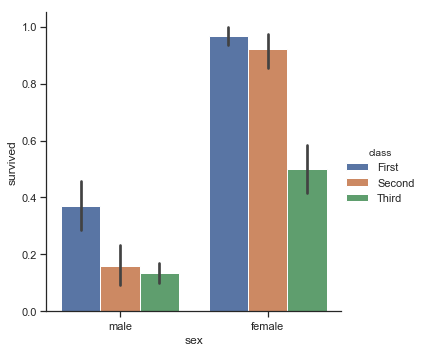

In [21]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

Generally this shows that women survived at a higher rate than men, but it is pretty depressing that nearly 100% of the first class women passengers survivied while about 50% of the third class ticket holders did.

The error bars here are the 95% confidence intervals.

A related plot doesn't compute the mean within each categorical variable but just counts the number of observations within a group.  For instance this is the number of people on each deck:

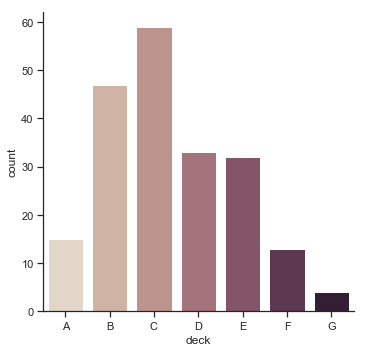

In [22]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

Or men versus women:

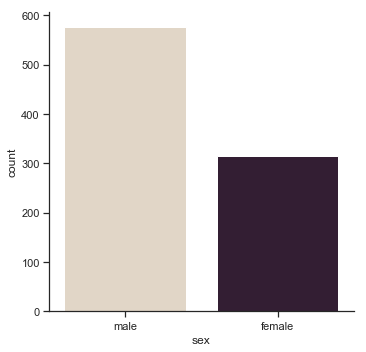

In [23]:
sns.catplot(x="sex", kind="count", palette="ch:.25", data=titanic);

Interesting to learn there were about twice as many men as women on the titanic!

These count plots are like a histogram but with a categorical variable.  These examples also show how to adjust the colors of a plot (known as the palette).  There is more information about this [here](https://seaborn.pydata.org/tutorial/color_palettes.html). 

### Point plots

Point plots are very much related to bar plots however instead of a bar, you just plot a point with an error bar around it.  In addition, these types of plots often include a line connecting the observations.  These are useful because they draw the eye to patterns of change across conditions.  They also make things like interactions more obvious.

Here is the same barplot from above on the titanic data this time as a line and point plot:

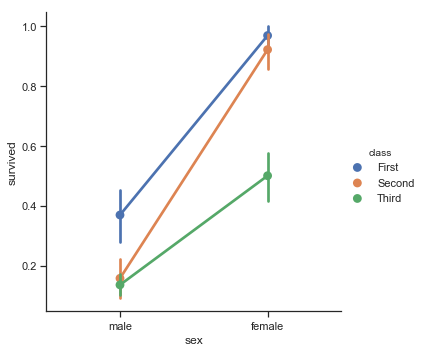

In [25]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

When you plot a figure like this one in black and white it might not be easy to map the colors of the legend to the lines.  For this reason, it is usually better to modify the line type and marker symbols. Here's one example of that type of customization in seaborn:

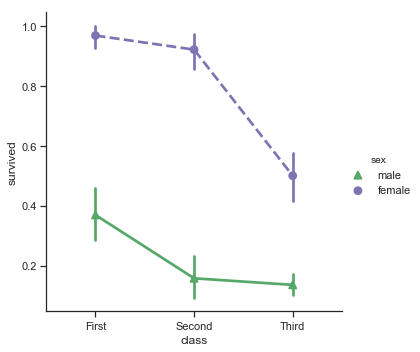

In [26]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

Notice that the linestyles used here are the same codes we described earlier for raw matplotlib.  That is because seaborn is deeply tied to matplotlib and thus learning a little matplotlib can help you understand why certain things in seaborn exist.

By now you should be getting the sense that while plotting in raw matplotlib usually requires many lines of code, plotting in seaborn usually takes just one line and a few options.  This is because seaborn tries to do most reasonable thing for you including nice colors, etc...  This lets you get nice and informative plots with little effort.  Then you can often go back and adjust things with addition options to seaborn functions (such as the example above).  In addition, since seaborn really is just a matplotlib figure you can use many matplotlib routines to adjust and customize your figures.

### Histograms

Histograms are another major type of plot which is important for exploring your datasets.  They make most sense when you have a univariate (i.e., single type of data) on an interval or ratio scale.  Most of you probably know how histograms work, since they’re so widely used, but for the sake of completeness I’ll describe them. All you do is divide up the possible values into bins, and then count the number of observations that fall within each bin. This count is referred to as the frequency of the bin, and is displayed as the height of a bar.

Histograms help reveal which values are common or typical in your data, what the shape of the overall distribution is (sometimes useful for checking the assumptions of certain statistical tests), and can help detect outliers and other anomolies in your data.  Histograms in seaborn are most often accessed view the figure-level function `sns.displot()`.

This function can take as input any arbitrary python list or array, or a data frame and column:

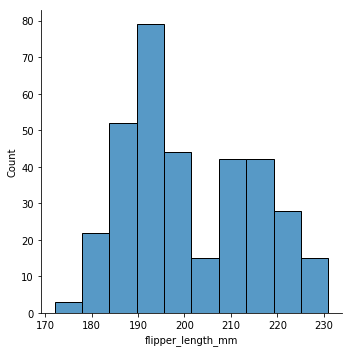

In [12]:
penguins = sns.load_dataset("penguins")
sns.displot(data=penguins, x="flipper_length_mm")

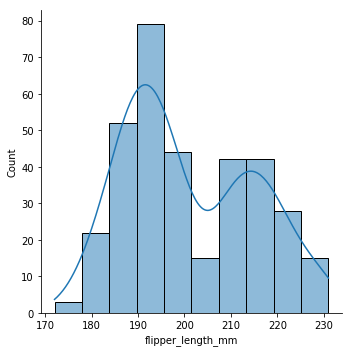

In [17]:
sns.displot(data=penguins, x="flipper_length_mm", kde="true")

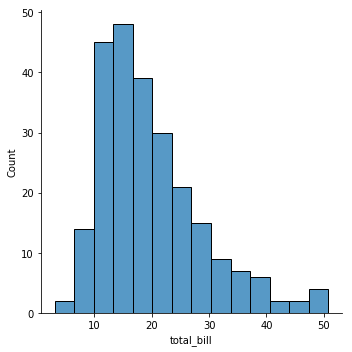

In [20]:
sns.displot(tips['total_bill']);

There are a couple key things about the `displot()` function.  The first is that there is a histogram with certain bins (which we might need to adjust), and there is a smoothed kernel-density estimate (KDE).  You can turn the KDE off like this:

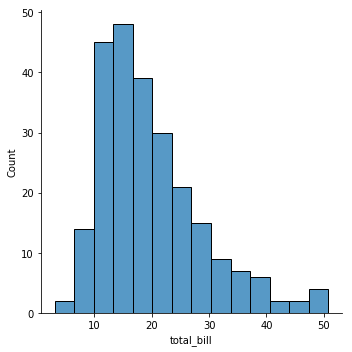

In [21]:
sns.displot(tips['total_bill'], kde=False);

Seaborn chooses reasonable bin widths and numbers of bins for you but you can change these things pretty easily.  For example, you can decrease the number of bins:

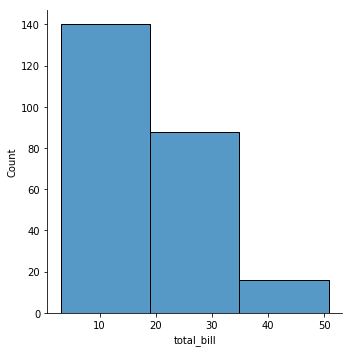

In [22]:
sns.displot(tips['total_bill'], kde=False, bins=3);

or increase them:

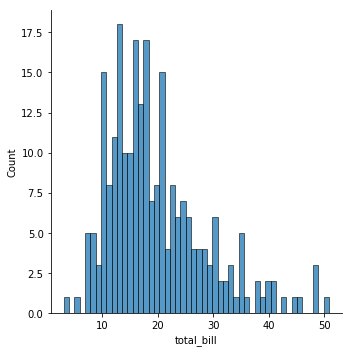

In [23]:
sns.displot(tips['total_bill'], kde=False, bins=50);

You can also specify them directly:

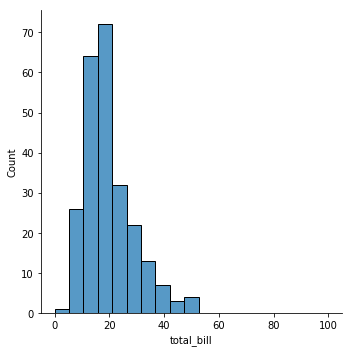

In [24]:
sns.displot(tips['total_bill'], kde=False, bins=np.linspace(0,100,20));

This later example uses `np.linspace()` to create a set of 20 bins ranging from zero 0 to 100.  This goes far past the largest observation we have (around 50) but can be useful in cases where you expected such observation to occur.

The full set of options for the `displot` command is [here](https://seaborn.pydata.org/generated/seaborn.distplot.html). Most of it makes sense and is easy to read but one in particularly you might be interested in is `norm_hist` option which can be `True` or `False` (it is false by default for all the examples we've done so far).  This adjust things so instead of showing the **number** of values that fall in a given bin is shows a density (more or less the fraction of total points that fall in the bin).  This can be useful in some circumstances.

If you want to combine more than one histogram into the same plot you can provide the different datasets in a list it will combine the data on the same axes.  Here is an example:

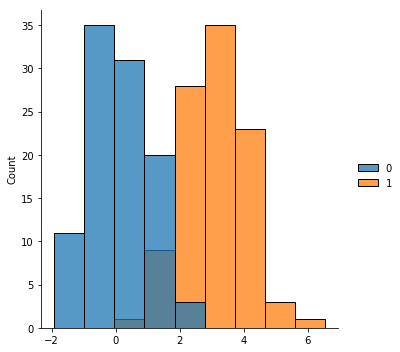

In [35]:
x = np.random.normal(0,1,size=100) # zero centered normal distribution
y = np.random.normal(3,1,size=100) # shift this one over
sns.displot([x,y])

### Bivariate histograms

One generalization of a histogram is to consider the relationship between two variables.  One version of this we have already encountered (the scatterplot).  We can augment our scatterplots with histograms on the margins (sides) of the figure.  This lets us see the distribution of both the x and y values while also seeing how the two variables relate to one another.

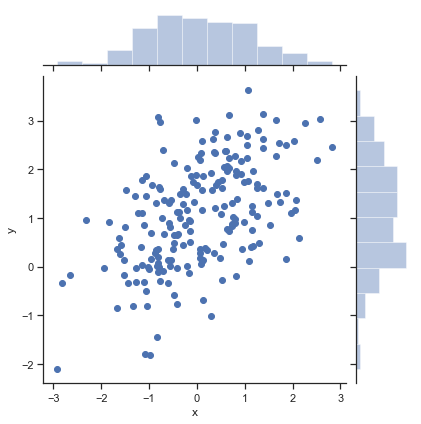

In [39]:
# make some data
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

sns.jointplot(x="x", y="y", data=df);

One generalization of a univariate histogram is the hexbin.  The hexbin divides the entire plot space into a tiling of hexagonal shapes and then counts how many of the scatter points fall in that cell.

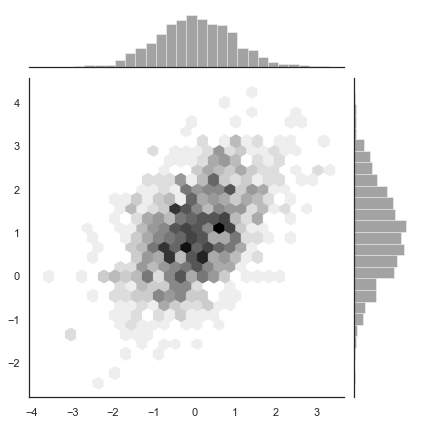

In [40]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

It is pretty cool looking!

Maybe even more futuristic is the kernel density estimator applied in two dimensions:

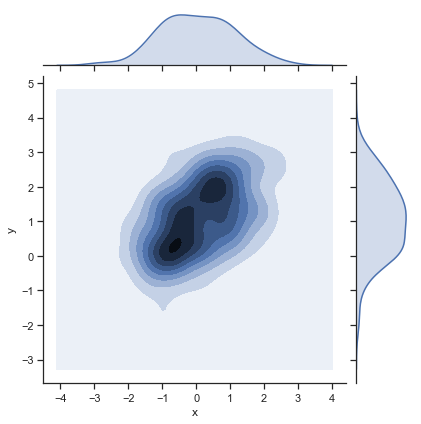

In [42]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

This give you something that looks like a elevation map or terain over which parts of the figure have the most data (i.e., which combinations of the x and y are common).

### Pairwise relationship plots

So far we have mostly consider univariate plots like a histogram or bivariate plots (as in the previous section).  However many dataset have many, many variables.  We want to visualize them all!  The problem is that when you get more than 2 dimensions it starts requiring three dimensional plots and when we go above three dimensions it can be hard to visualize things.  One approach for multivariate data is to look at all combinations of the pairwise relationships.  This can be done easily in seaborn with the `sns.pairplot()` figure level function.  Let's look at the classic `iris` dataset which includes a number of features of common iris flowers:

In [43]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The following plots shows scatter plots of each continuous feature (sepal_length, sepal_width, petal_length, petal_width) against every other in a matrix.  In addition, on the diagonal it has plotted the univariate histogram (instead of a plots of x versus x which would always look like a line).

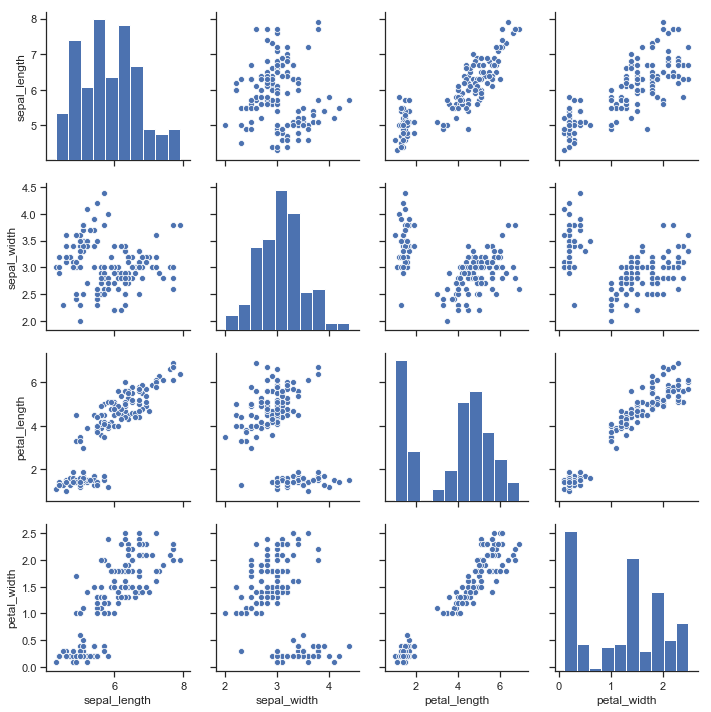

In [46]:
sns.pairplot(iris);

This function includes the hue semantics making quite interesting and rich plots:

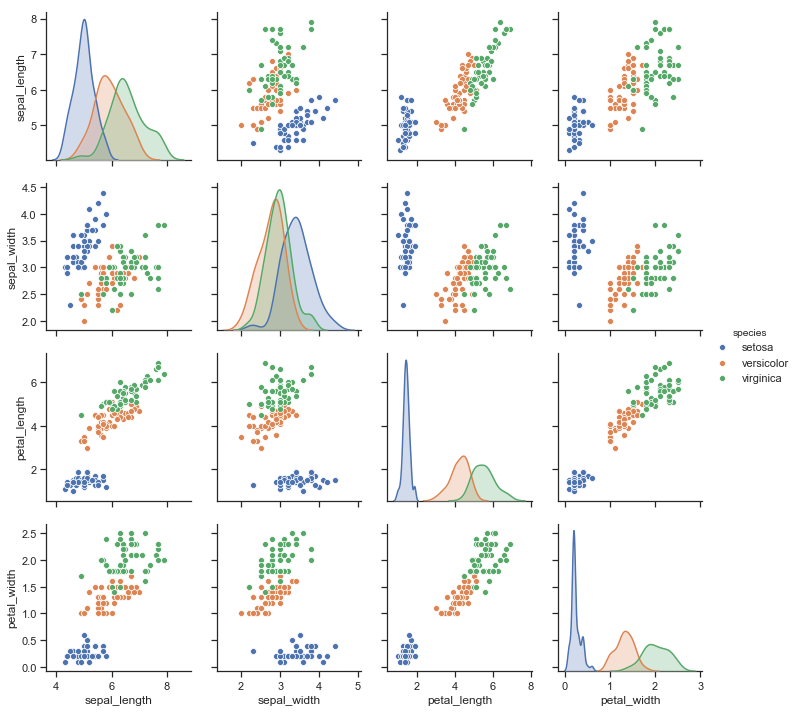

In [47]:
sns.pairplot(iris, hue="species");

### Linear relationships

The last type of plot we will consider involves adding to the plot some type of statistical model.  This most interesting in the case of scatterplots.  When we plot a scatterplot we are often interested in the strength of the relationship between two variables.  However, when there is a lot of noise in a dataset it can be hard to see this relationship and so we often turn to models such as linear regression to assess the relationship.  

A full discussion of linear regression will need to wait until a later chapter.  However, it is helpful to know that seaborn has a variety of scatterplots that also will fit and display a linear regression on your data.  If you remember we made scatterplots using `sns.replot()`.  To instead explore the regression form of the plot use `sns.lmplot()`.

Let's go back to the `tips` data set we considered earlier:

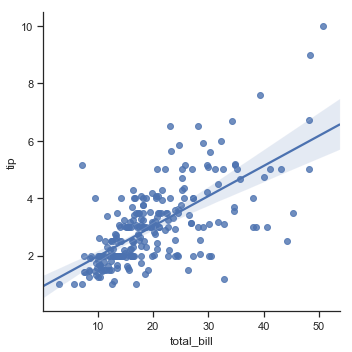

In [71]:
sns.lmplot(x="total_bill", y="tip", data=tips);

You can also plot a linear relationship with ordered factors (like the size of the party):

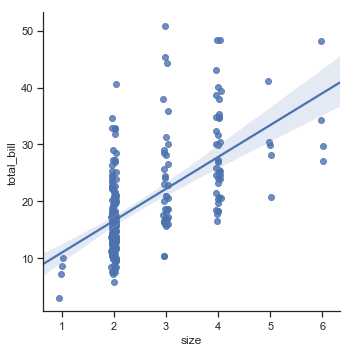

In [74]:
sns.lmplot(x="size", y="total_bill", x_jitter=.05, data=tips);

 Here we can clearly see how the total bill goes up as the number of people in the party increases.  The linear regression line here is useful because of the large number of 2 party tables.  We might not be able to make sense of that big cloud of points visually but the regression helps us understand it better.

Finally you can very easily plot different regression lines by grouping the data based on another factor (in this case smoker status):

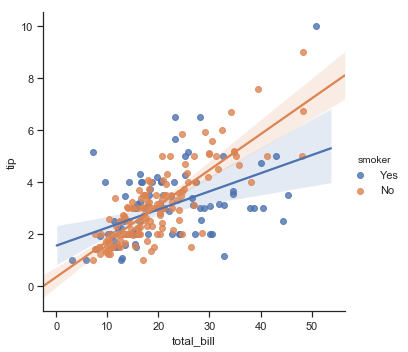

In [76]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

This is quite powerful because in one line you can actually compare the strength of the linear relationship within two subsets of the data.  There are a lot more options and details to the `lmplot()` functions but we will end here and instead refer you to the [seaborn tutorial on visualizing linear relationships. for more information](https://seaborn.pydata.org/tutorial/regression.html).  The important goal for this chapter is to just raise your awareness of the options and plot types.

## Saving Figures

When you have a plot that you like in your jupyter notebook you often then want to include it in a presentation or a paper.   One way to do this is to simply click on the image in jupyter and select "save image as..." and it will save to a location you choose.  However, a slightly better way, allowing more control over the file type is to call the seaborn `savefig()` function.  Here is an example:

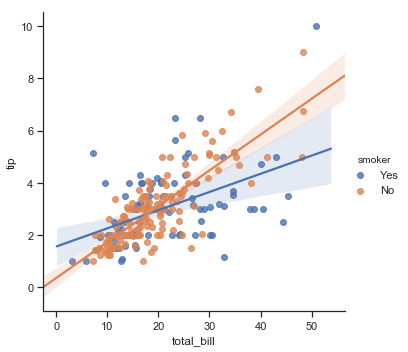

In [77]:
myfig = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);
myfig.savefig('smoking_tips.png')

This will explore to the same folder as your notebook a PNG (portable network graphics) version of the file.  This actually calls the matplotlib `savefig` function which is documented [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html).  You can choose a variety of file types includeing PNG, JPG, TIFF, or PDF.  In addition there are options to adjust the dots per inch in the figure which can be needed for high quality printing.

## Creating Figures for Presentations and Publications versus Exploratory Data Analysis

We conclude this chapter with a short discussion about the difference between creating figures for exploratory data analysis and for presentation/communication to others.  When we are using a tool like seaborn to perform exploratory data analysis we tend to let the default options of seaborn go and not worry too much about the details of our figures.  The key is here being quick and having very short, readable code for analyzing and exploring.

However, when we come to a final conclusion about a dataset, perhaps backed up by statistics, we often have to choose from one of several plots to include in a paper or presentation about our data.  These are often the most important or interesting results that we want to tell others about.  In this case, it is helpful to do several extra steps to prepare for publication-quality images.  For example, the default font size in seaborn is quite small.  When you are working in a Jupyter notebook this is not problem.  However, if you present a seaborn plot directly on a projector in a slide presentation it can be hard to read the axis labels.  In addition, by default seaborn uses the names of columns of a data frame as axis labels:

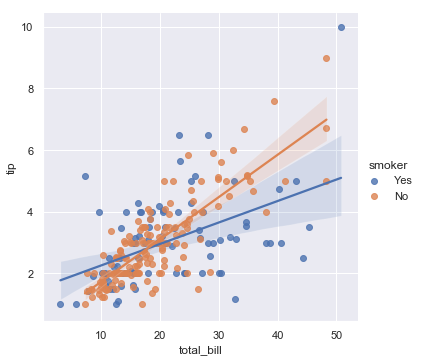

In [39]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

Since we are familiar with the `tips` dataframe we know what `total_bill` is and the assumed units (dollars? cents?).  However in a presentation we can't count on a audience member knowing these things or keeping track of them in their mind.  As a result we usually want to make a figure more clear, using thicker lines and larger fonts.

Interesting seaborn can help with this as well with a method call `set_context()`.  There are several pre-set context including `paper`, `notebook`, `talk`, and `poster`.  `notebook` theme is the default we have been using, so we don't need to explore that one.  Let's examine how each of these other context alter the plot above.

### The `paper` theme

The paper theme makes the axis and legend features even smaller which might be ok when printed out on a higher resolution pdf.

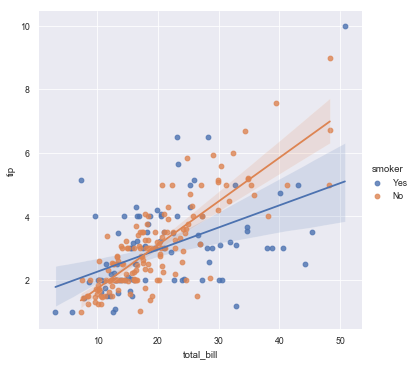

In [42]:
sns.set_context("paper")
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

### The `talk` theme

The talk theme makes the dots and lines thicker and increases the font size for being projected on a wall or large lower resolution screen.

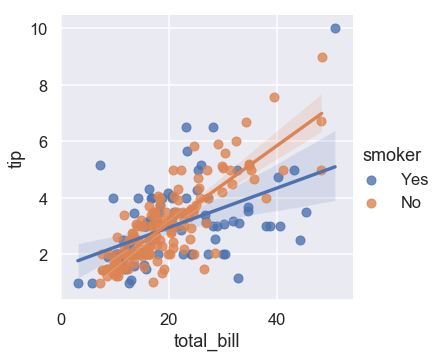

In [44]:
sns.set_context("talk")
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

### The `poster` theme

The poster theme makes the dots and lines even thicker than the talk theme!

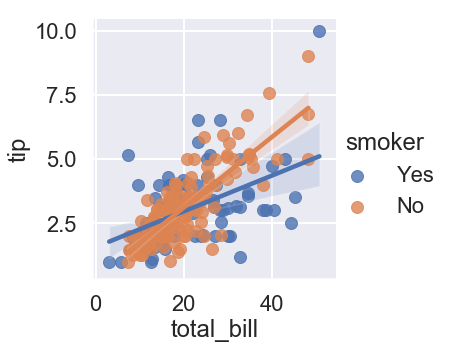

In [47]:
sns.set_context("poster")
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

In addition to changing the visibility of these elements for higher and lower resolution output devices it also makes sense in a communicative setting to make the axis labels human-readable.  We often do that using matplotlib functions to change the axis labels:

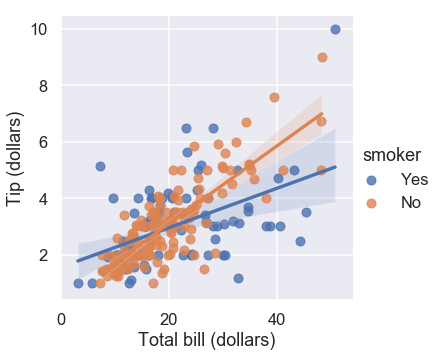

In [56]:
sns.set_context("talk")
g=sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);
g.set_axis_labels("Total bill (dollars)", "Tip (dollars)")

Again, you might not take the time to make these changes while doing exploratory analysis in the Jupyter notebook but when you decide a graph is important enough to communicate to someone else, you often want to make some changes to it.

```{warning}
If you remember from a previous chapter the mantra for the course is **do everything in code**.  This applies to creating figures as well.  It is not a good practice to generate figures in Jupyter/seaborn and then export them and edit them in photoshop or illustrator or another drawing program.  Although this offers even more customization and can be easier than struggling with the seaborn/matplotlib documentation to figure out how to do something, it leads to figures which are not easy to replicate by someone and can introduce distortions and modifications of the data which are misleading.  If you do everything in code there is always a trail of how things were made and that can be verified by someone else!
```

## Moving Data - Animations and Interactive Plots

So far we have focused on plots that fig in a single graphic or across multiple panels of a graphic.  This makes sense because at least until recently academic papers are largely static documents with words and pictures.  However, this is changing and unlikely to be true for very long and of course in a presentation you can include movies and animations to help grab the attention of your audience.  We will talk about this as "moving data" because we can change aspects of a plot over time by plotting different data or changing the mapping between data point and visual features of a plot over time.

One of the most famous talks that makes use of animated plots is the [TED Talk](https://www.ted.com/talks) by [Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling).  Watch it here and then test your understanding by trying to answer a few comprehension questions.

<iframe width="560" height="315" src="https://www.youtube.com/embed/usdJgEwMinM" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>


```{admonition} Test yourself: Why is using average data within countries "dangerous"?
:class: hint
- The values are hard to measure and therefore unreliable
- The world is changing
- The within-country variance in outcomes is influenced by income distribution
```
```{admonition} Click the button to reveal the answer!
:class: dropdown
Hans shows at [this timepoint](https://youtu.be/usdJgEwMinM?t=835) that within countries the richest and poorest people have significant differences in child survival.
```



```{admonition} Test yourself: What is the mistaken understanding of the world exhibited by Hans' students?
:class: hint
- The developed world has small families and long lives and developing world has large families and short lives
- The change in laws in the middle east influenced life expectancies
- Opening the Chinese economy improved life expectancy
```
```{admonition} Click the button to reveal the answer!
:class: dropdown
Hans describes the general incorrect assumption of this students about the developed world having small families and long lives while the developing world has large families and short lives [this timepoint](https://youtu.be/usdJgEwMinM?t=188).  His animations show this is changing quickly and there are important individual countries and regional differences.
```

The reason the video by Rosling is so famous is that the nature of his dynamic visualizations help people understand how the world is changing over the last several decades.  These plots challenge people's stereotypes about parts of the world and help them see better the nuance between the impacts of development and public health.

### Making animations  and interactive plots in Python and Jupyter

Completely describing how to make animation and interactive visualization in Python is beyond the scope of this course unfortunately.  There are lots of software packages that help with this and also several different approaches that you might want to use if, for instance, you mainly want a interactive visualization for use in Jupyter (to aid your data analysis) versus including in a talk.  However, I will quickly show two code snippets that let you make animations and interactive plots.

If you are interested in making a bunch of seaborn or matplotlib plots and then animating them like a flip book the [Celluloid package](https://github.com/jwkvam/celluloid) can help.  The basic idea if that you make a "camera" object and snap a photo of each frame of your movie, each time replotting your figure.  The library then animates it and can explore it is a movie.

In [13]:
%%capture
from celluloid import Camera

fig, axes = plt.subplots()
camera = Camera(fig)
for _ in range(50):
    north_pole = npr.uniform(1,10,10)
    south_pole = npr.uniform(1,10,10)
    sns.regplot(north_pole, south_pole, ci=None, ax=axes)
    plt.xlim([0,10])
    plt.ylim([0,10])
    camera.snap()

animation = camera.animate()

Then to display the animation:

In [14]:
display(HTML(animation.to_html5_video()))

Then to save the movie to a file for like a talk you can do:
`animation.save('animation.mp4')`

Another approach to making plots is to make them more interactive.  This is useful if you are sharing your Jupyter notebook with some so they can access a Jupyter kernel (these interactive elements do not easily run outside of the notebook interface).  To learn more about this read about the [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) library.

## Further Reading and Resources

- A create and comprehensive [seaborn tutorial](https://seaborn.pydata.org/tutorial.html)
- [Data visualization: A practical introduction](https://socviz.co)
- Another approach to [creating animated graphs in python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)

## References

```{bibliography} ../../references.bib
:filter: docname in docnames
```